In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import statsmodels.api as sm

In [3]:
epa_data = pd.read_csv("E:\DATA ANALYST\Statistics for Data Science\Sampling\modified_c4_epa_air_quality.csv", index_col = 0)

In [5]:
epa_data.head(10)

,state_name,county_name,city_name,local_site_name,parameter_name,units_of_measure,aqi_log
date_local,,,,,,,
2018-01-01,Arizona,Maricopa,Buckeye,BUCKEYE,Carbon monoxide,Parts per million,2.079442
2018-01-01,Ohio,Belmont,Shadyside,Shadyside,Carbon monoxide,Parts per million,1.791759
2018-01-01,Wyoming,Teton,Not in a city,Yellowstone National Park - Old Faithful Snow ...,Carbon monoxide,Parts per million,1.098612
2018-01-01,Pennsylvania,Philadelphia,Philadelphia,North East Waste (NEW),Carbon monoxide,Parts per million,1.386294
2018-01-01,Iowa,Polk,Des Moines,CARPENTER,Carbon monoxide,Parts per million,1.386294
2018-01-01,Hawaii,Honolulu,Not in a city,Kapolei,Carbon monoxide,Parts per million,2.708050
2018-01-01,Hawaii,Honolulu,Not in a city,Kapolei,Carbon monoxide,Parts per million,1.098612
2018-01-01,Pennsylvania,Erie,Erie,NaN,Carbon monoxide,Parts per million,1.098612
2018-01-01,Hawaii,Honolulu,Honolulu,Honolulu,Carbon monoxide,Parts per million,1.791759


In [7]:
epa_data.describe(include='all')

,state_name,county_name,city_name,local_site_name,parameter_name,units_of_measure,aqi_log
count,260,260,260,257,260,260,260.000000
unique,52,149,190,253,1,1,NaN
top,California,Los Angeles,Not in a city,Kapolei,Carbon monoxide,Parts per million,NaN
freq,66,14,21,2,260,260,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,1.766921
std,NaN,NaN,NaN,NaN,NaN,NaN,0.714716
min,NaN,NaN,NaN,NaN,NaN,NaN,0.000000
25%,NaN,NaN,NaN,NaN,NaN,NaN,1.098612
50%,NaN,NaN,NaN,NaN,NaN,NaN,1.791759
75%,NaN,NaN,NaN,NaN,NaN,NaN,2.302585


In [11]:
population_mean = epa_data['aqi_log'].mean()
population_mean

1.7669210929985582

In [13]:
sampled_data = epa_data.sample(n=50,replace='True',random_state=42)

In [15]:
sampled_data.head(10)

,state_name,county_name,city_name,local_site_name,parameter_name,units_of_measure,aqi_log
date_local,,,,,,,
2018-01-01,Texas,Harris,Houston,Clinton,Carbon monoxide,Parts per million,1.098612
2018-01-01,California,Imperial,Calexico,Calexico-Ethel Street,Carbon monoxide,Parts per million,3.295837
2018-01-01,Alabama,Jefferson,Birmingham,Arkadelphia/Near Road,Carbon monoxide,Parts per million,1.098612
2018-01-01,Arizona,Maricopa,Tempe,Diablo,Carbon monoxide,Parts per million,2.397895
2018-01-01,Virginia,Roanoke,Vinton,East Vinton Elementary School,Carbon monoxide,Parts per million,0.693147
2018-01-01,Texas,Harris,Houston,Clinton,Carbon monoxide,Parts per million,1.098612
2018-01-01,North Carolina,Mecklenburg,Charlotte,Garinger High School,Carbon monoxide,Parts per million,1.098612
2018-01-01,Florida,Broward,Davie,Daniela Banu NCORE,Carbon monoxide,Parts per million,1.791759
2018-01-01,California,Humboldt,Eureka,Jacobs,Carbon monoxide,Parts per million,1.791759


In [17]:
sample_mean = sampled_data['aqi_log'].mean()
sample_mean

1.6379981384419398

In [21]:
estimate_list = []
for i in range(10000):
    estimate_list.append(epa_data['aqi_log'].sample(n=50,replace=True).mean())

In [23]:
estimate_df = pd.DataFrame(data={'estimate': estimate_list})
estimate_df

,estimate
0,1.695269
1,1.787510
2,1.821800
3,1.885724
4,1.818690
...,...
9995,1.778919
9996,1.616839
9997,1.793398
9998,1.919141


In [25]:
mean_sample_means = estimate_df['estimate'].mean()
mean_sample_means

1.7658641517690372

<Axes: >

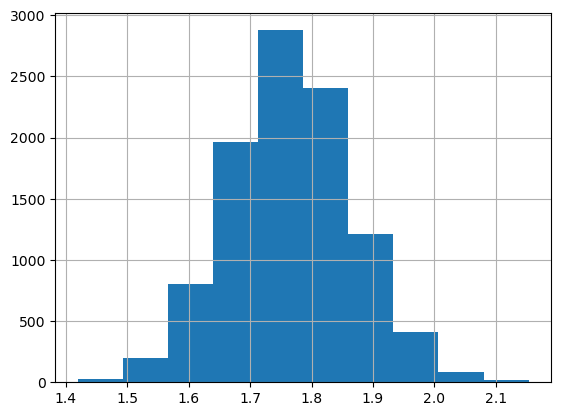

In [27]:
estimate_df['estimate'].hist()

In [31]:
standard_error = sampled_data['aqi_log'].std() / np.sqrt(len(sampled_data))
standard_error

0.0945235150131964

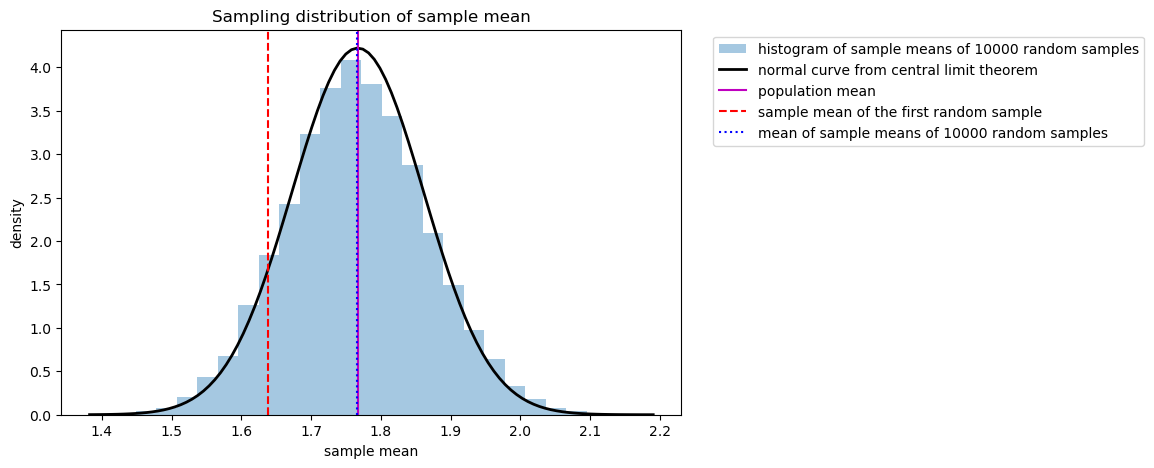

In [33]:
plt.figure(figsize=(8,5))
plt.hist(estimate_df['estimate'], bins=25, density=True, alpha=0.4, label = "histogram of sample means of 10000 random samples")
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100) # generate a grid of 100 values from xmin to xmax.
p = stats.norm.pdf(x, population_mean, standard_error)
plt.plot(x, p, 'k', linewidth=2, label = 'normal curve from central limit theorem')
plt.axvline(x=population_mean, color='m', linestyle = 'solid', label = 'population mean')
plt.axvline(x=sample_mean, color='r', linestyle = '--', label = 'sample mean of the first random sample')
plt.axvline(x=mean_sample_means, color='b', linestyle = ':', label = 'mean of sample means of 10000 random samples')
plt.title("Sampling distribution of sample mean")
plt.xlabel('sample mean')
plt.ylabel('density')
plt.legend(bbox_to_anchor=(1.04,1));